In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
df = pd.read_csv('boston,ma.csv',
                usecols=['boston,ma_maxtempC', 
                        'boston,ma_mintempC',
                        'boston,ma_totalSnow_cm'])
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'boston,ma.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   boston,ma_maxtempC      728 non-null    int64  
 1   boston,ma_mintempC      728 non-null    int64  
 2   boston,ma_totalSnow_cm  728 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 17.2 KB


In [5]:
df.shape

(728, 3)

<AxesSubplot:>

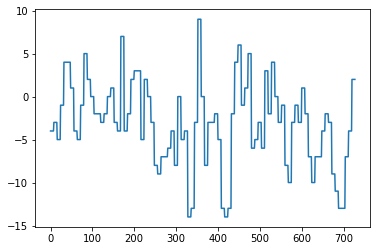

In [7]:
# let's create a line plot for min temp
df['boston,ma_mintempC'].plot.line()

In [8]:
df = pd.read_csv('boston,ma.csv',
                usecols=['date_time','boston,ma_maxtempC', 
                        'boston,ma_mintempC',
                        'boston,ma_totalSnow_cm'],
                parse_dates=['date_time'],
                index_col='date_time')
df.head()

,"boston,ma_maxtempC","boston,ma_mintempC","boston,ma_totalSnow_cm"
date_time,,,
2018-12-11 00:00:00,1,-4,0.0
2018-12-11 03:00:00,1,-4,0.0
2018-12-11 06:00:00,1,-4,0.0
2018-12-11 09:00:00,1,-4,0.0
2018-12-11 12:00:00,1,-4,0.0


<AxesSubplot:title={'center':'Boston in the winter'}, xlabel='date_time'>

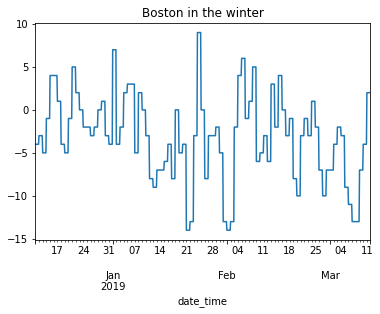

In [9]:
# let's make our plot even snazzier
# first: let's add a title

df['boston,ma_mintempC'].plot.line(title='Boston in the winter')

<AxesSubplot:title={'center':'Boston in the winter'}, xlabel='date_time'>

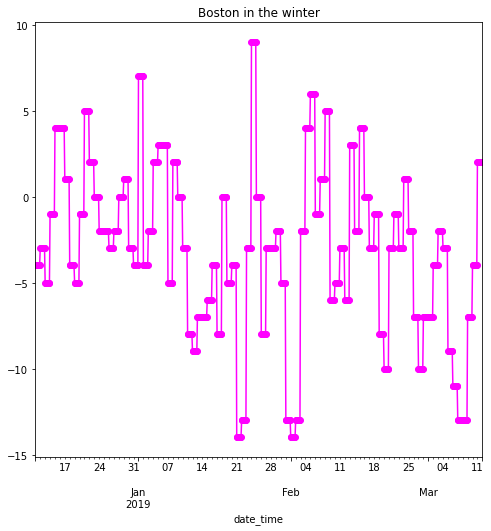

In [15]:
df['boston,ma_mintempC'].plot.line(title='Boston in the winter',
                                  color='#ff00ff',   # full red, 0 green, full blue == full purple
                                  style='-o',
                                  figsize=(8,8))        # use lines (-), and mark data with circles (o)

In [16]:
df['boston,ma_mintempC'].mean()   # mean temperature on a single column

-3.142857142857143

In [17]:
df.mean()

boston,ma_maxtempC        2.868132
boston,ma_mintempC       -3.142857
boston,ma_totalSnow_cm    0.826374
dtype: float64

<AxesSubplot:title={'center':'Boston in the Winter'}, xlabel='date_time'>

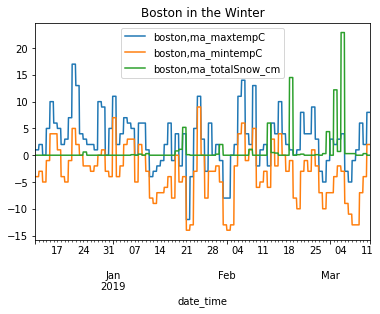

In [20]:
df.plot.line(title="Boston in the Winter")

In [21]:
df.columns = ['max', 'min', 'snow']

<AxesSubplot:xlabel='date_time'>

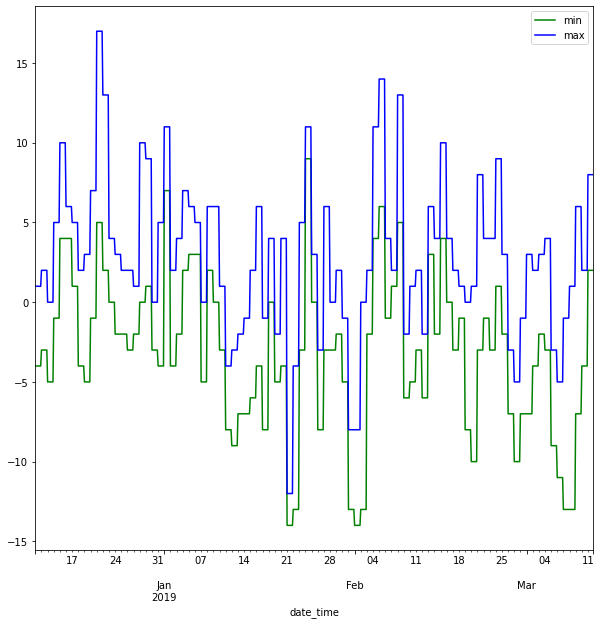

In [23]:
df[['min', 'max']].plot.line(figsize=(10,10),
                            color=['green', 'blue'])

array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>],
      dtype=object)

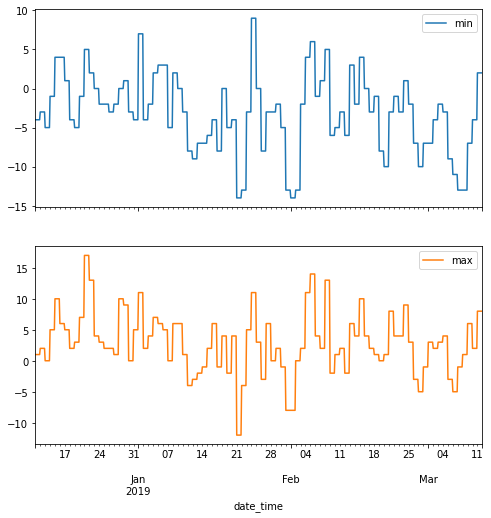

In [24]:
# sometimes, you want to plot columns alongside one another, but you don't want them
# in the same plot.

# for this, we have "subplots"

df[['min', 'max']].plot.line(subplots=True, figsize=(8,8))

<AxesSubplot:title={'center':'Boston in the Winter'}, xlabel='date_time'>

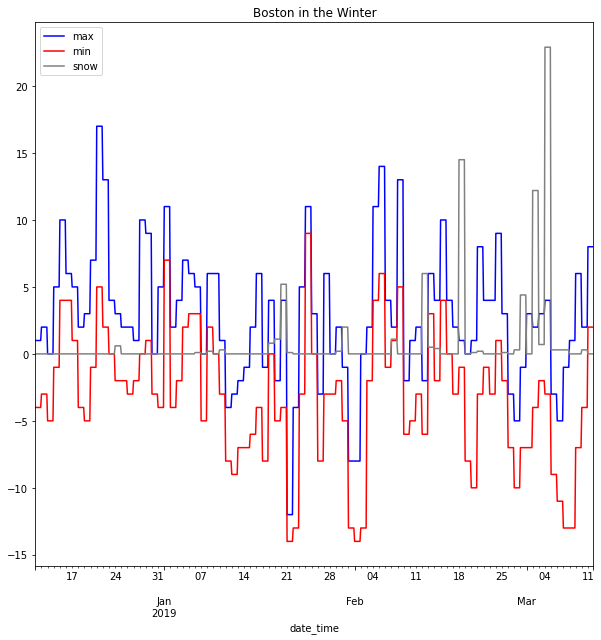

In [27]:
df[['max', 'min', 'snow']].plot.line(title="Boston in the Winter",figsize=(10,10),
            color=['blue', 'red', 'gray'])

array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>], dtype=object)

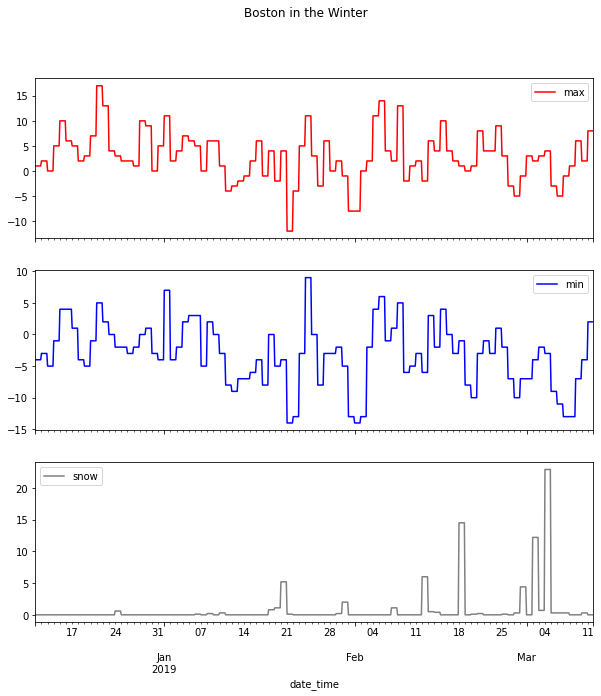

In [30]:
df[['max', 'min', 'snow']].plot.line(title="Boston in the Winter",figsize=(10,10),
            color=['red', 'blue', 'gray'],
                                    subplots=True)

<AxesSubplot:xlabel='date_time'>

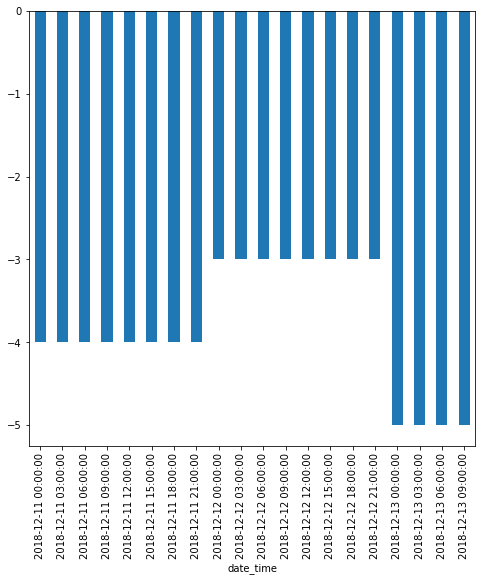

In [31]:
# I'm just going to plot the first 20 rows of this data frame

df.loc[:'2018-12-13 09:00:00', 'min'].plot.bar(figsize=(8,8))   # this creates a bar plot for our min column

<AxesSubplot:xlabel='date_time'>

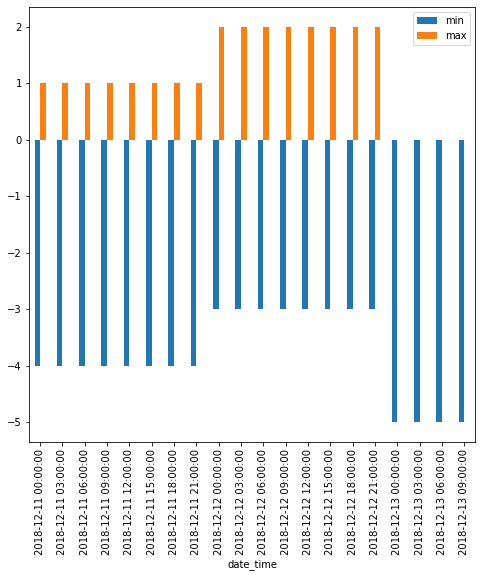

In [33]:
#if I want to plot both the min and the max, I can do that

df.loc[:'2018-12-13 09:00:00',  # row selector
       ['min', 'max']  # column selector
      
      ].plot.bar(figsize=(8,8))

In [3]:
df = DataFrame([['apple', 1, 20],
                ['banana', 1.2, 15],
                ['cucumber', 0.5, 30],
                ['dill', 2, 10],
                ['endive', 5, 3]],
              columns=['product_name', 'price', 'sales']).set_index('product_name')
df

,price,sales
product_name,,
apple,1.0,20
banana,1.2,15
cucumber,0.5,30
dill,2.0,10
endive,5.0,3


<AxesSubplot:xlabel='product_name'>

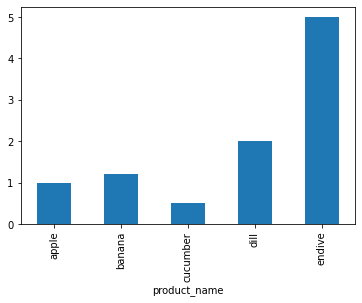

In [4]:
df['price'].plot.bar()

In [5]:
# what happens if there is 10% tax on each of our products?
# I can create a "tax" column, and then "total_price" column 

df['tax'] = df['price'] * 0.1
df

,price,sales,tax
product_name,,,
apple,1.0,20,0.10
banana,1.2,15,0.12
cucumber,0.5,30,0.05
dill,2.0,10,0.20
endive,5.0,3,0.50


In [6]:
df['total_price'] = df['price'] + df['tax']
df

,price,sales,tax,total_price
product_name,,,,
apple,1.0,20,0.10,1.10
banana,1.2,15,0.12,1.32
cucumber,0.5,30,0.05,0.55
dill,2.0,10,0.20,2.20
endive,5.0,3,0.50,5.50


<AxesSubplot:xlabel='product_name'>

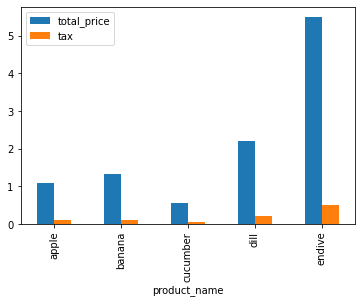

In [7]:
df[['total_price','tax']].plot.bar()

array([<AxesSubplot:title={'center':'price'}, xlabel='product_name'>,
       <AxesSubplot:title={'center':'tax'}, xlabel='product_name'>],
      dtype=object)

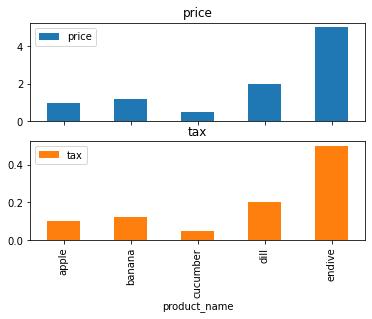

In [8]:
# what I really want to see is the total price, broken down into price and tax (separately)
# one thought: subplots

df[['price', 'tax']].plot.bar(subplots=True)

<AxesSubplot:title={'center':'Price&Tax'}, xlabel='product_name'>

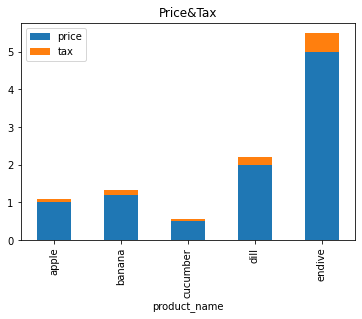

In [10]:
# I can instead ask for the bar plot to be "stacked"
# meaning: for every index, create *one* bar, combining all of the different columns

df[['price', 'tax']].plot.bar(title="Price&Tax",stacked=True)

In [4]:
data=pd.read_csv('C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/nyc_taxi_2019-01.csv',
                  usecols=["fare_amount","extra","mta_tax","tip_amount","tolls_amount",
                            "improvement_surcharge","congestion_surcharge"])
                                                                                                     
data.head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
0,7.0,0.5,0.5,1.65,0.0,0.3,NaN
1,14.0,0.5,0.5,1.00,0.0,0.3,NaN
2,4.5,0.5,0.5,0.00,0.0,0.3,NaN
3,3.5,0.5,0.5,0.00,0.0,0.3,NaN
4,52.0,0.0,0.5,0.00,0.0,0.3,NaN


<AxesSubplot:>

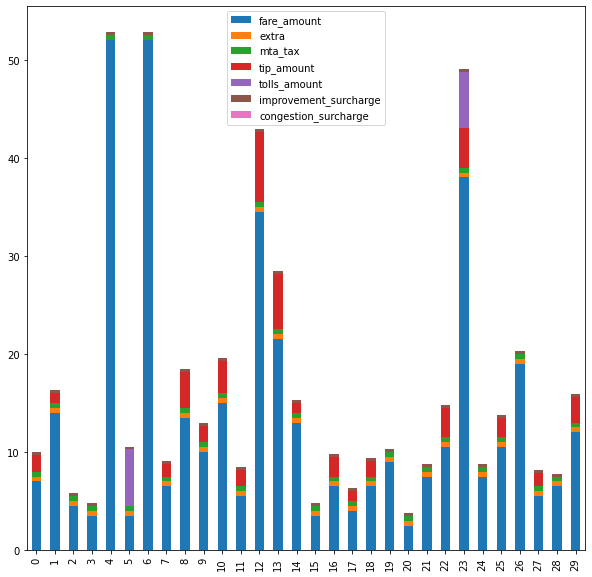

In [5]:
data[:30].plot.bar(figsize=(10,10),stacked=True)

<AxesSubplot:>

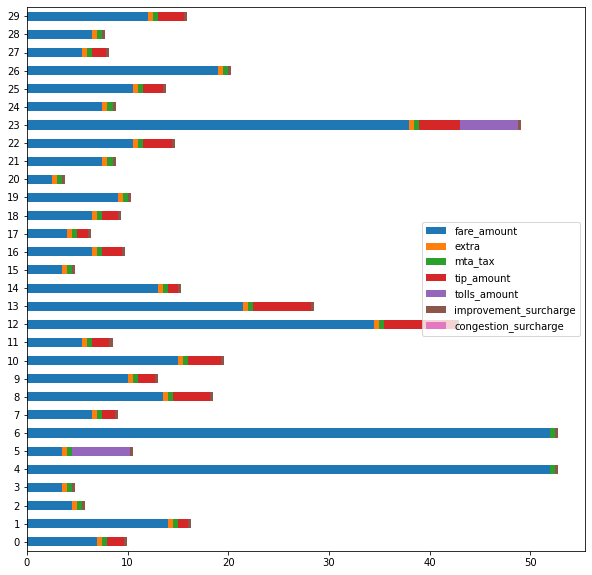

In [6]:
data[:30].plot.barh(figsize=(10,10),stacked=True)

In [10]:
s=Series(np.random.randint(0,10,100))
s

0     8
1     3
2     2
3     6
4     3
     ..
95    8
96    3
97    1
98    9
99    8
Length: 100, dtype: int32

<AxesSubplot:ylabel='Frequency'>

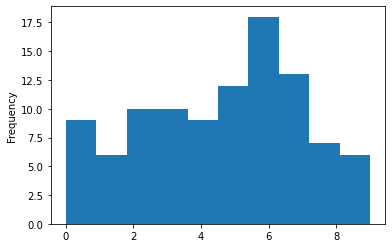

In [11]:
s.plot.hist()

In [17]:
data=pd.read_csv('C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/nyc_taxi_2019-01.csv',
                  usecols=["tpep_pickup_datetime","passenger_count","tip_amount","total_amount","trip_distance"],parse_dates=["tpep_pickup_datetime"])


In [18]:
data.head()

,tpep_pickup_datetime,passenger_count,trip_distance,tip_amount,total_amount
0,2019-01-01 00:46:40,1,1.5,1.65,9.95
1,2019-01-01 00:59:47,1,2.6,1.00,16.30
2,2018-12-21 13:48:30,3,0.0,0.00,5.80
3,2018-11-28 15:52:25,5,0.0,0.00,7.55
4,2018-11-28 15:56:57,5,0.0,0.00,55.55


In [18]:
data.dtypes

tpep_pickup_datetime    datetime64[ns]
passenger_count                  int64
trip_distance                  float64
tip_amount                     float64
total_amount                   float64
dtype: object

<AxesSubplot:ylabel='Frequency'>

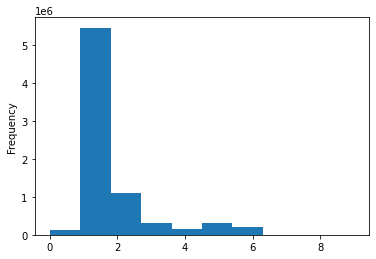

In [19]:
#Histogram showing how often each number of passengers travels in a taxi.
data["passenger_count"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

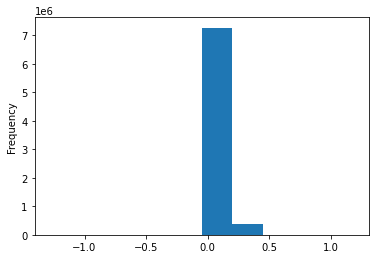

In [20]:
(data["tip_amount"]/data["total_amount"]).plot.hist()

In [21]:
# remove all total_amounts <= and tip_amounts <0

df = data.loc[(data['tip_amount'] >= 0) & (data['total_amount'] > 0)]
df.shape

(7659247, 5)

<AxesSubplot:ylabel='Frequency'>

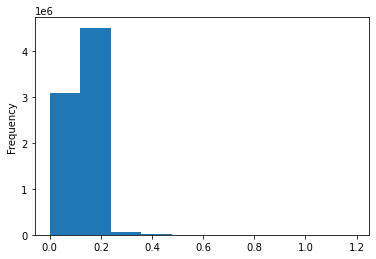

In [22]:
(df['tip_amount'] / df['total_amount']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

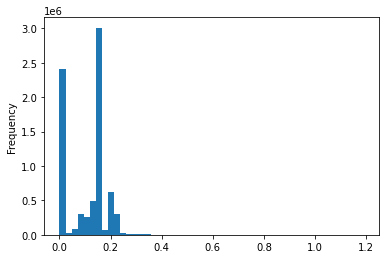

In [23]:
# I want to break this down even further
# I can control the number of bins in my histogram (not the default 10)

(df['tip_amount'] / df['total_amount']).plot.hist(bins=50)

In [26]:
# remove all total_amounts < and tip_amounts <0

df = df.loc[(df['tip_amount'] >= 0) & (df['total_amount'] > 0)]
df.shape


(7659247, 5)

<AxesSubplot:ylabel='Frequency'>

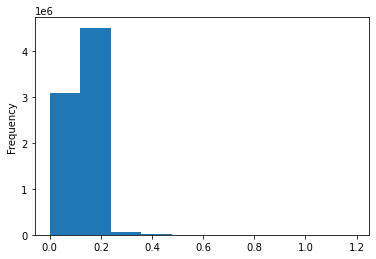

In [27]:
(df['tip_amount'] / df['total_amount']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

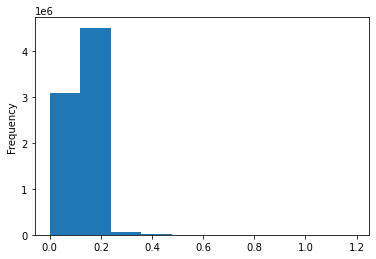

In [28]:
(df['tip_amount'] / df['total_amount']).plot.hist(20)

In [29]:
# remove all total_amounts < and tip_amounts <0
df = df.loc[(df['tip_amount'] > 0) & (df['total_amount'] > 0)]
df.shape

(5257377, 5)

<AxesSubplot:ylabel='Frequency'>

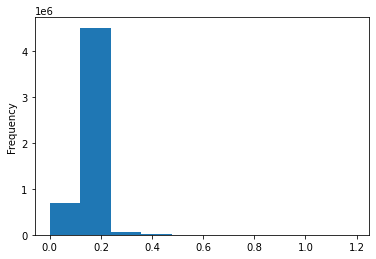

In [30]:
(df['tip_amount'] / df['total_amount']).plot.hist(20)

In [31]:
df = DataFrame([['apple', 1, 20],
                ['banana', 1.2, 15],
                ['cucumber', 0.5, 30],
                ['dill', 2, 10],
                ['endive', 5, 3]],
              columns=['product_name', 'price', 'sales']).set_index('product_name')
df

,price,sales
product_name,,
apple,1.0,20
banana,1.2,15
cucumber,0.5,30
dill,2.0,10
endive,5.0,3


In [32]:
# I want to know how much of my income is coming from each product

df['income'] = df['price'] * df['sales']
df

,price,sales,income
product_name,,,
apple,1.0,20,20.0
banana,1.2,15,18.0
cucumber,0.5,30,15.0
dill,2.0,10,20.0
endive,5.0,3,15.0


In [33]:
# I want to know: Of the total income, how much comes from each product?

# option 1: sum the income column, and then show the proportion of income from each product

df['income'] / df['income'].sum()
#TE DA EL PORCENTAJE DEL INCOME DE CADA PRODUCTO.

product_name
apple       0.227273
banana      0.204545
cucumber    0.170455
dill        0.227273
endive      0.170455
Name: income, dtype: float64

<AxesSubplot:ylabel='income'>

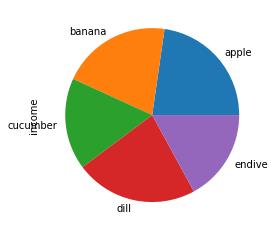

In [34]:
# option 2: I can use a pie plot, which graphically renders the same calculation we just did

df['income'].plot.pie()

<AxesSubplot:ylabel='price'>

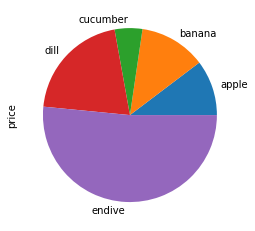

In [35]:
# a pie plot is only appropriate where you have a numeric column, and you want to
# see the proportion of that total provided by each row.

df['price'].plot.pie()  # does this make any sense? No!

In [36]:
# it's not uncommon to combine value_counts with a pie plot
# if you have a column that isn't summable, but you are interested in how often each particular
#  value appears, then you might want to use value_counts, get a series back, and then
#  get a pie plot for that series